# **Data**

## **Exercise 1 - Exploring Class Separability**

Understanding how data is distributed is the first step before designing a network architecture. In this exercise, you will generate and visualize a two-dimensional dataset to explore how data distribution affects the complexity of the decision boundaries a neural network would need to learn.

### **Generate the Data**

**Create a synthetic dataset with a total of 400 samples, divided equally among 4 classes (100 samples each).**

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define parameters for each class
class_params = {
    0: {'mean': [2, 3], 'std': [0.8, 2.5]},
    1: {'mean': [5, 6], 'std': [1.2, 1.9]},
    2: {'mean': [8, 1], 'std': [0.9, 0.9]},
    3: {'mean': [15, 4], 'std': [0.5, 2.0]}
}

# Generate the data
data = []
labels = []

for label, params in class_params.items():
    samples = np.random.randn(100, 2) * params['std'] + params['mean']
    data.append(samples)
    labels.append(np.full(100, label))

# Combine into arrays
data = np.vstack(data)
labels = np.hstack(labels)

print("Dataset generated: ", data.shape, labels.shape)

Dataset generated:  (400, 2) (400,)


### **Plot the Data**

**Create a 2D scatter plot showing all the data points. Use a different color for each class to make them distinguishable.**

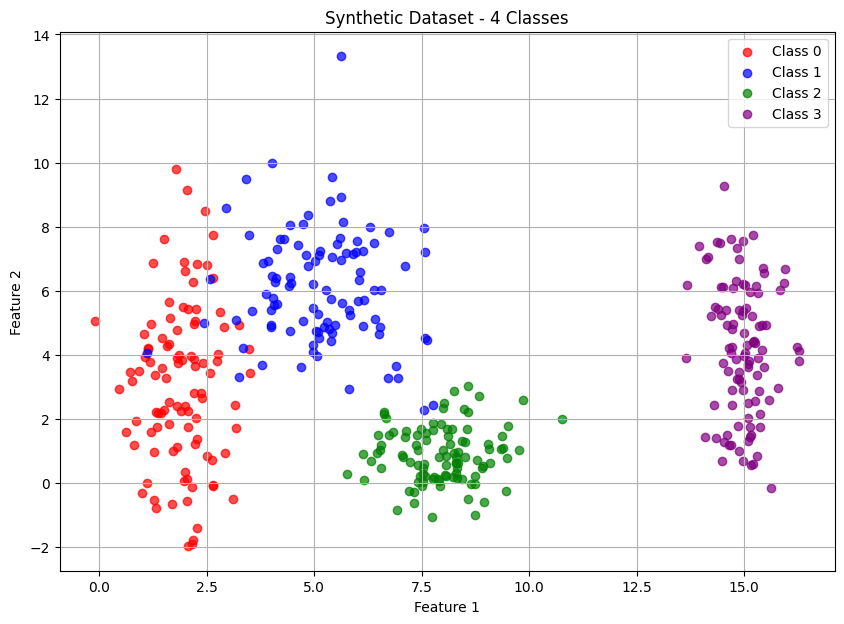

In [28]:
plt.figure(figsize=(10, 7))
colors = ['red', 'blue', 'green', 'purple']

for i in range(4):
    plt.scatter(
        data[labels == i, 0],
        data[labels == i, 1],
        label=f'Class {i}',
        color=colors[i],
        alpha=0.7
    )

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset - 4 Classes')
plt.legend()
plt.grid(True)
plt.show()

### **Analyze and Draw Boundaries**

**a. Examine the scatter plot carefully. Describe the distribution and overlap of the four classes.**

Class 0: Spread around (2,3) with a wider vertical spread due to the higher standard deviation in the y-direction (2.5).

Class 1: Clustered near (5,6) but with moderate spread in both directions.

Class 2: Compact and tight cluster around (8,1) with almost circular spread due to similar standard deviation in x and y.

Class 3: Very concentrated horizontally near x=15 but elongated vertically due to a larger y standar deviation (2.0).

There’s clear separation between Class 3 and the others due to its large x mean.

Classes 0, 1, and 2 show potential overlap:

Class 0 and Class 1 overlap slightly in the higher y-region.

Class 2 is more isolated near x=8 and y=1, but some overlap could occur along its boundary with Class 1 if noise increases.

**b. Based on your visual inspection, could a simple, linear boundary separate all classes?**

A single linear boundary would not perfectly separate all classes:

Class 3 is linearly separable.

Classes 0, 1, and 2 are intertwined in the central region, requiring non-linear decision boundaries for clean separation.

**c. On your plot, sketch the decision boundaries that you think a trained neural network might learn to separate these classes.**

A trained neural network would learn to separate these classes with non-linear boundaries that might look something like this:

![decision_boundaries](../images/sketch.jpg)

## **Exercise 2 - Non-Linearity in Higher Dimensions**

Simple neural networks (like a Perceptron) can only learn linear boundaries. Deep networks excel when data is not linearly separable. This exercise challenges you to create and visualize such a dataset.

### **Generate the Data**

**Create a dataset with 500 samples for Class A and 500 samples for Class B.**

In [11]:
# Parameters for Class A
mean_A = np.array([0, 0, 0, 0, 0])
cov_A = np.array([
    [1.0, 0.8, 0.1, 0.0, 0.0],
    [0.8, 1.0, 0.3, 0.0, 0.0],
    [0.1, 0.3, 1.0, 0.5, 0.0],
    [0.0, 0.0, 0.5, 1.0, 0.2],
    [0.0, 0.0, 0.0, 0.2, 1.0]
])

# Parameters for Class B
mean_B = np.array([1.5, 1.5, 1.5, 1.5, 1.5])
cov_B = np.array([
    [1.5, -0.7, 0.2, 0.0, 0.0],
    [-0.7, 1.5, 0.4, 0.0, 0.0],
    [0.2, 0.4, 1.5, 0.6, 0.0],
    [0.0, 0.0, 0.6, 1.5, 0.3],
    [0.0, 0.0, 0.0, 0.3, 1.5]
])

# Generate samples
samples_A = np.random.multivariate_normal(mean_A, cov_A, size=500)
samples_B = np.random.multivariate_normal(mean_B, cov_B, size=500)

# Create labels
labels_A = np.zeros(500)  # Class A = 0
labels_B = np.ones(500)   # Class B = 1

# Combine data
X = np.vstack([samples_A, samples_B])
y = np.hstack([labels_A, labels_B])

print("Dataset shape:", X.shape)
print("Labels shape:", y.shape)

Dataset shape: (1000, 5)
Labels shape: (1000,)


### **Visualize the Data**

Since you cannot directly plot a 5D graph, you must reduce its dimensionality.

**Use a technique like **Principal Component Analysis (PCA)** to project the 5D data down to 2 dimensions.**
**Create a scatter plot of this 2D representation, coloring the points by their class (A or B).**

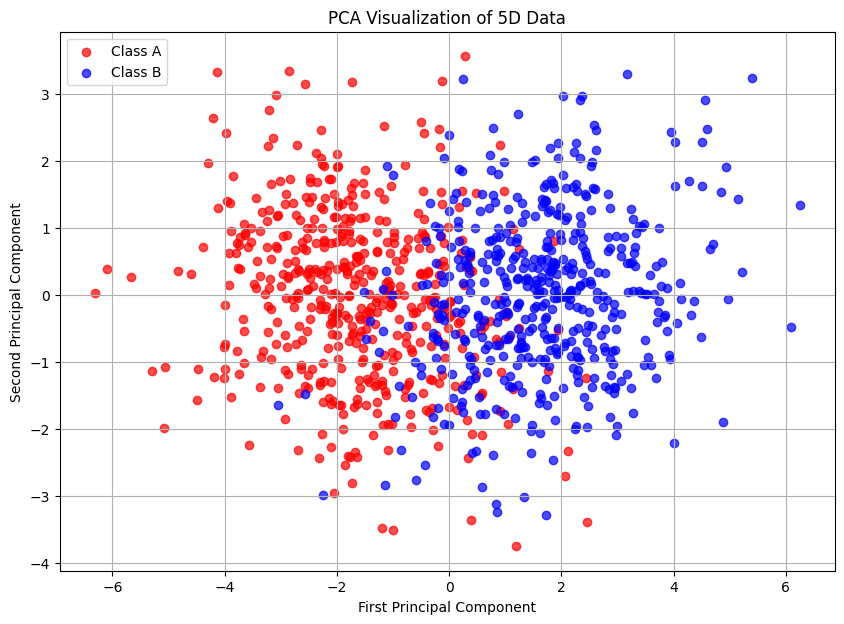

In [27]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 7))
colors = ['red', 'blue']
classes = ['A', 'B']
for i, color in enumerate(colors):
    plt.scatter(
        X_pca[y == i, 0],
        X_pca[y == i, 1],
        label=f'Class {classes[i]}',
        color=color,
        alpha=0.7
    )
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Visualization of 5D Data')
plt.legend()
plt.grid()
plt.show()

### **Analyze the Plot**

**a. Based on your 2D projection, describe the relationship between the two classes.**

The 2D projection shows significant overlap between Classes A and B. The class centers are slightly offset, but their distributions largely intersect. Both classes show similar spread patterns, making it difficult to distinguish clear boundaries between them in this reduced dimensional space.

**b. Discuss the **linear separability** of the data. Explain why this type of data structure poses a challenge for simple linear models and would likely require a multi-layer neural network with non-linear activation functions to be classified accurately.**

The 5D dataset presents significant challenges for linear classification due to its complex structure. The PCA visualization reveals substantial overlap between classes, and the different covariance patterns in each class create intricate relationships that a simple linear boundary cannot capture. A multi-layer neural network with non-linear activation functions would be more suitable as it can transform the input space and learn complex decision boundaries that better separate the classes.

## **Exercise 3 - Preparing Real-World Data for a Neural Network**

This exercise uses a real dataset from Kaggle. Your task is to perform the necessary preprocessing to make it suitable for a neural network that uses the hyperbolic tangent (tanh) activation function in its hidden layers.

### **Get the Data**
**Download the [**Spaceship Titanic**](https://www.kaggle.com/competitions/spaceship-titanic) dataset from Kaggle.**

### **Describe the Data**

**Briefly describe the dataset's objective (i.e., what does the `Transported` column represent?).**

The Spaceship Titanic dataset is designed for a classification task where the goal is to predict the value of the target variable Transported. This column is boolean:

True → the passenger was transported to another dimension following the spaceship incident.

False → the passenger was not transported and stayed in the original dimension.

This problem is analogous to survival prediction on the Titanic dataset but framed in a sci-fi setting.

In [21]:
import pandas as pd

df = pd.read_csv("spaceship-titanic/train.csv")

df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**List the features and identify which are **numerical** (e.g., `Age`, `RoomService`) and which are **categorical** (e.g., `HomePlanet`, `Destination`).**

In [ ]:
target_column = 'Transported'
y = df[target_column].astype(int)
X = df.drop(columns=[target_column])

numerical_features = X.select_dtypes(include=['number']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("\nNumerical Features:")
for feature in numerical_features:
    print(f"- {feature}")

print("\nCategorical Features:")
for feature in categorical_features:
    print(f"- {feature}")


Numerical Features:
- Age
- RoomService
- FoodCourt
- ShoppingMall
- Spa
- VRDeck

Categorical Features:
- PassengerId
- HomePlanet
- CryoSleep
- Cabin
- Destination
- VIP
- Name


**Investigate the dataset for **missing values**. Which columns have them, and how many**

In [23]:
missing_counts = df.isna().sum()
n_rows = len(df)

missing_table = (
    pd.DataFrame({
        "missing_count": missing_counts,
        "missing_pct": (missing_counts / n_rows * 100).round(2)
    })
    .query("missing_count > 0")
    .sort_values("missing_count", ascending=False)
)

print("\nMissing Values")
print(missing_table.to_string(float_format=lambda x: f"{x:,.2f}%"))


Missing Values
              missing_count  missing_pct
CryoSleep               217        2.50%
ShoppingMall            208        2.39%
VIP                     203        2.34%
HomePlanet              201        2.31%
Name                    200        2.30%
Cabin                   199        2.29%
VRDeck                  188        2.16%
FoodCourt               183        2.11%
Spa                     183        2.11%
Destination             182        2.09%
RoomService             181        2.08%
Age                     179        2.06%


### Preprocess the Data

Your goal is to clean and transform the data so it can be fed into a neural network. The `tanh` activation function produces outputs in the range `[-1, 1]`, so your input data should be scaled appropriately for stable training.

**Handle Missing Data: Devise and implement a strategy to handle the missing values in all the affected columns. Justify your choices.**

- Numerical Features (Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck)
Use median imputation. Median is robust against outliers (e.g., some passengers spend huge amounts in VRDeck or FoodCourt).

- Categorical Features (HomePlanet, Destination, Cabin)
Use most frequent (mode) imputation. This fills missing entries with the most common value, which preserves the categorical distribution. Drop PassengerId and Name as they are identifiers.

- Boolean Features (CryoSleep, VIP)
Treat them as categorical and impute with most frequent value. This avoids introducing bias since only ~2% are missing.

In [26]:
from sklearn.impute import SimpleImputer

# Define the columns we will actually use downstream
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
categorical_features = ['HomePlanet', 'Destination', 'Cabin', 'CryoSleep', 'VIP']

# Drop identifier columns from features
id_cols = ['PassengerId', 'Name']
X = df.drop(columns=[target_column] + id_cols, errors='ignore').copy()

# Create imputers
num_imputer = SimpleImputer(strategy="median")          # robust to outliers in spend columns
cat_imputer = SimpleImputer(strategy="most_frequent")   # preserves mode for categoricals/booleans

# APPLY the imputers (this was missing)
X[numerical_features] = num_imputer.fit_transform(X[numerical_features])
X[categorical_features] = cat_imputer.fit_transform(X[categorical_features])

# Sanity check: no missing values should remain in these groups
print("Remaining NAs (numeric):", int(X[numerical_features].isna().sum().sum()))
print("Remaining NAs (categorical):", int(X[categorical_features].isna().sum().sum()))

Remaining NAs (numeric): 0
Remaining NAs (categorical): 0


**Encode Categorical Features: Convert categorical columns like `HomePlanet`, `CryoSleep`, and `Destination` into a numerical format. One-hot encoding is a good choice.**

In [28]:
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)
print("Encoded shape:", X_encoded.shape)

Encoded shape: (8693, 6571)


**Normalize/Standardize Numerical Features: Scale the numerical columns (e.g., `Age`, `RoomService`, etc.). Since the `tanh` activation function is centered at zero and outputs values in `[-1, 1]`, **Standardization** (to mean 0, std 1) or **Normalization** to a `[-1, 1]` range are excellent choices. Implement one and explain why it is a good practice for training neural networks with this activation function.**

In [29]:
from sklearn.preprocessing import MinMaxScaler

# Scale numerics in the encoded/imputed feature matrix
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = X_encoded.copy()
X_scaled[numerical_features] = scaler.fit_transform(X_scaled[numerical_features])

# Quick preview
print(X_scaled[numerical_features].head())

        Age  RoomService  FoodCourt  ShoppingMall       Spa    VRDeck
0 -0.012658    -1.000000  -1.000000     -1.000000 -1.000000 -1.000000
1 -0.392405    -0.984784  -0.999396     -0.997872 -0.951000 -0.996354
2  0.468354    -0.993997  -0.760105     -1.000000 -0.400660 -0.995939
3 -0.164557    -1.000000  -0.913930     -0.968415 -0.702874 -0.984005
4 -0.594937    -0.957702  -0.995304     -0.987145 -0.949572 -0.999834


Why this helps with tanh?

- tanh outputs in [-1,1] and is most sensitive near 0.

- Scaling inputs into [-1,1] keeps activations in the high-gradient region, improving stability and speed of training.

### **Visualize the Results:**
**Create histograms for one or two numerical features (like `FoodCourt` or `Age`) **before** and **after** scaling to show the effect of your transformation.**

Text(0.5, 1.0, 'Age — After Scaling ([-1, 1])')

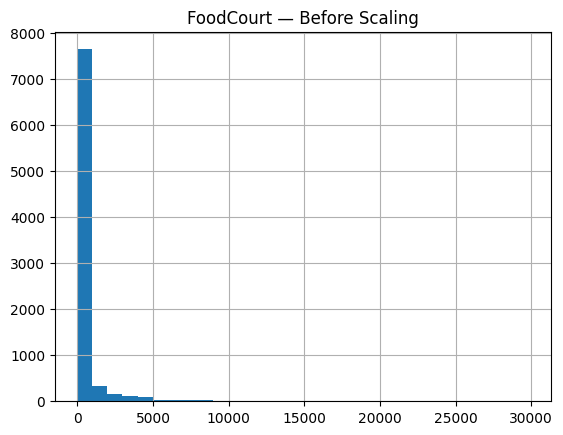

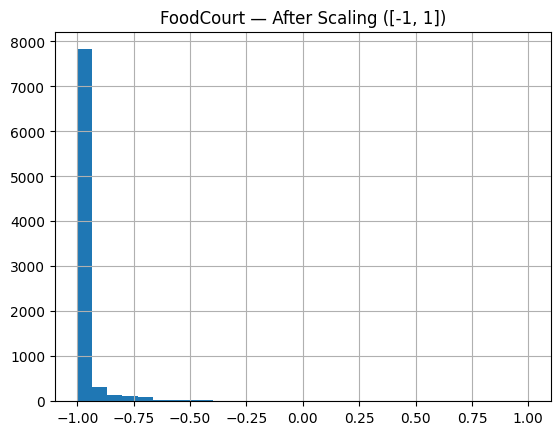

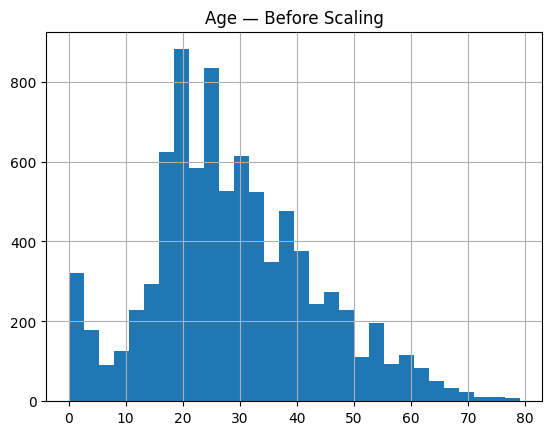

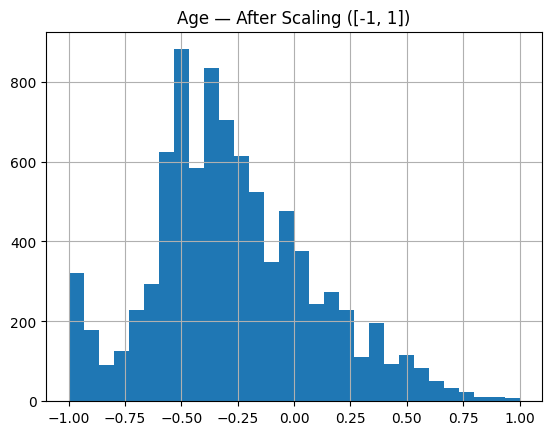

In [34]:
import matplotlib.pyplot as plt

plt.figure()
df['FoodCourt'].dropna().hist(bins=30)
plt.title('FoodCourt — Before Scaling')

plt.figure()
X_scaled['FoodCourt'].dropna().hist(bins=30)
plt.title('FoodCourt — After Scaling ([-1, 1])')

plt.figure()
df['Age'].dropna().hist(bins=30)
plt.title('Age — Before Scaling')

plt.figure()
X_scaled['Age'].dropna().hist(bins=30)
plt.title('Age — After Scaling ([-1, 1])')
